<a href="https://colab.research.google.com/github/akashtepan/Coronavirus_Tweet_Sentiment_Analysis_Classification/blob/main/Shubham_Tepan_Notebook_Coronavirus_Tweet_Sentiment_Analysis_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Coronavirus Tweet Sentiment Analysis**



##### **Project Type**    - Classification
##### **Contribution**    - Shubham Tepan (Individual)

# **Project Summary**

The project involves building a classification model to predict the sentiment of COVID-19 tweets. The dataset used for this task has been pulled from Twitter, and manual tagging has been done to label the tweets with their sentiment. To protect the privacy of the users, the names and usernames have been given codes. The dataset includes columns such as UserName, ScreenName, Location, TweetAt, OriginalTweet, and Sentiment. The Sentiment column is the target variable that the machine learning model will be trained to predict.

# **GitHub Link -** 

# **Problem Statement**


The problem statement for this project is to build a machine learning model that can accurately classify the sentiment of COVID-19 tweets. Given a new tweet related to COVID-19, the model should be able to predict whether the sentiment of the tweet is positive, negative, or neutral. The model will be trained on a dataset of manually labeled COVID-19 tweets pulled from Twitter. The goal is to build a model that can help to understand the overall sentiment of people on social media regarding COVID-19, which can be useful for public health researchers, policymakers, and other stakeholders.

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [1]:
# Importing Libraries
import numpy as np # library for numerical operations
import pandas as pd # library for data manipulation
import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for plotting
%matplotlib inline
import warnings; warnings.simplefilter('ignore') # suppress warnings

# Importing libraries for text preprocessing and NLP
import re # library for regular expressions
import nltk # natural language processing toolkit
nltk.download('stopwords') # download stop words corpus
nltk.download('wordnet') # download wordnet corpus
from nltk.stem.snowball import SnowballStemmer # import snowball stemmer from nltk
from nltk.corpus import stopwords # import stopwords corpus from nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Dataset Loading

In [2]:
# Import the drive module from the google.colab library
from google.colab import drive

# Mount the drive onto the '/content/drive' directory
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the CSV file from the given path in Google Drive
# use the ISO-8859-1 encoding to handle any special characters in the text data
tweet_df = pd.read_csv('/content/drive/MyDrive/Coronavirus Tweets.csv', encoding="ISO-8859-1")


### Dataset First View

In [4]:
# Displaying the first 5 rows of the dataset
tweet_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

### Dataset Rows & Columns count

In [5]:
# Finding the number of rows and columns in the dataset
rows, columns = tweet_df.shape

# Printing the number of rows and columns in the dataset
print('The dataset has', rows, 'rows and', columns, 'columns.')

The dataset has 41157 rows and 6 columns.


### Dataset Information

In [6]:
# Getting information about the dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


### What did you know about your dataset?

* The dataset contains 41157 rows and 6 columns.

* The columns are named 'UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', and 'Sentiment'.

* The 'UserName' and 'ScreenName' columns are of integer data type and the 'Location', 'TweetAt', 'OriginalTweet', and 'Sentiment' columns are of object data type.

* The 'Location' column has some missing values as the non-null count is less than the total number of rows.

* The 'OriginalTweet' column contains the actual text of the tweet.

* The 'Sentiment' column is the target variable which needs to be predicted using a classification model. It indicates the sentiment of the tweet and can have one of three possible values: 'Positive', 'Negative', or 'Neutral'.

* The dataset contains tweets related to COVID-19 and has been manually tagged with their sentiment.

## ***Understanding Your Variables***

In [7]:
# generate statistical summary of all columns in the DataFrame, including numeric and non-numeric columns
# using the describe() method with the include parameter set to 'all'
tweet_df.describe(include='all')

UserName    ScreenName Location     TweetAt  \
count   41157.000000  41157.000000    32567       41157   
unique           NaN           NaN    12220          30   
top              NaN           NaN   London  20-03-2020   
freq             NaN           NaN      540        3448   
mean    24377.000000  69329.000000      NaN         NaN   
std     11881.146851  11881.146851      NaN         NaN   
min      3799.000000  48751.000000      NaN         NaN   
25%     14088.000000  59040.000000      NaN         NaN   
50%     24377.000000  69329.000000      NaN         NaN   
75%     34666.000000  79618.000000      NaN         NaN   
max     44955.000000  89907.000000      NaN         NaN   

                                            OriginalTweet Sentiment  
count                                               41157     41157  
unique                                              41157         5  
top     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...  Positive  
freq                                                    1     11422  
mean                                                  NaN       NaN  
std                                                   NaN       NaN  
min                                                   NaN       NaN  
25%                                                   NaN       NaN  
50%                                                   NaN       NaN  
75%                                                   NaN       NaN  
max                                                   NaN       NaN

In [8]:
# Storing the column names of the dataset in a variable
columns = tweet_df.columns

# Printing the column names
print('Column Names:')
print(columns)

Column Names:
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


### Variables Description 

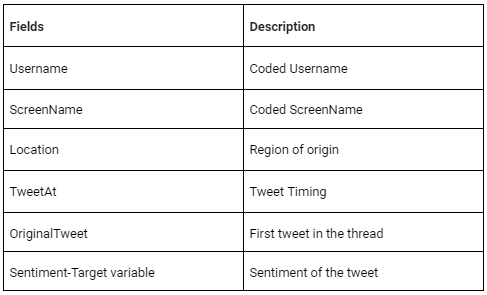

### Check Unique Values for each variable.

In [9]:
# Iterate over all columns in the dataset and print the number of unique values in each column
for i in tweet_df.columns:
  print("Total Unique Values in", i, "-", len(tweet_df[i].unique()))

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12221
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


### Handling Missing Values

In [10]:
# Missing values
def missing_percentage(tweet_df):
    """This function takes a DataFrame(tweet_df) as input and returns two columns, total missing values and total missing values percentage"""
    total = tweet_df.isnull().sum().sort_values(ascending = False)
    percent = round(tweet_df.isnull().sum()/len(tweet_df)*100,2).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# Missing value percentage 
print(missing_percentage(tweet_df))

               Total  Percent
Location        8590    20.87
UserName           0     0.00
ScreenName         0     0.00
TweetAt            0     0.00
OriginalTweet      0     0.00
Sentiment          0     0.00


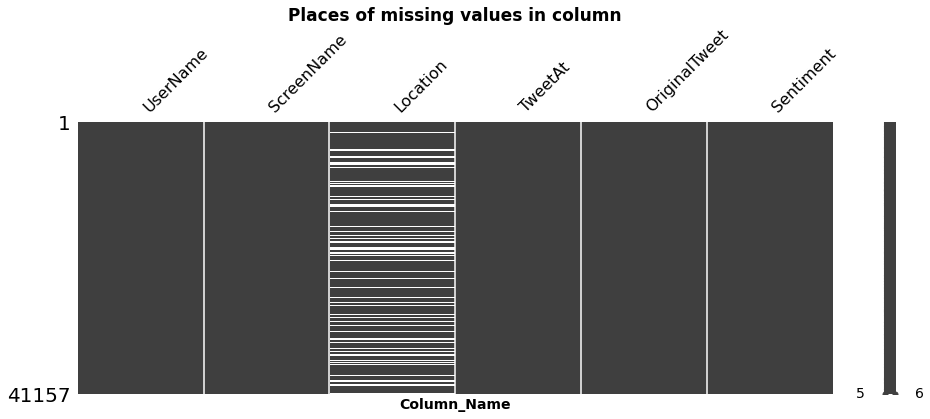

In [11]:
# Import the missingno library
import missingno as msno

# Generate a matrix plot of the missing values in the DataFrame
msno.matrix(tweet_df, figsize=(15, 5))
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

* The specific chart used is a matrix plot of the missing values in the DataFrame. The chart was chosen by the me to visualize the missing values in the dataset.

* The chart shows that missing values are only present in the 'Location' column, and they make up approximately 20.87% of the total number of rows in the dataset.


# **EDA**

## **Important Columns**
- Location: geographic location associated with the tweet
- TweetAt: time when the tweet was posted
- Sentiment: sentiment of the tweet
- OriginalTweet: original text of the tweet

# **Location**

In [12]:
# generate a count of unique values in the 'Location' column of the DataFrame
# using the value_counts() method
# then show the top 10 locations with the highest counts using the head() method
tweet_df.Location.value_counts().head(15)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Name: Location, dtype: int64

In [13]:
# describe the 'Location' column of the DataFrame using the describe() method
tweet_df.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

# **Top 15 Locations**

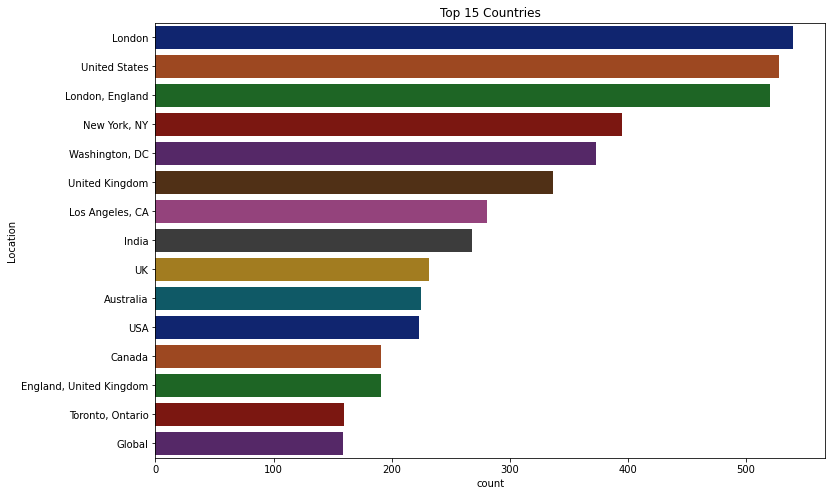

In [14]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the countplot
sns.countplot(y=tweet_df.Location, 
              order=tweet_df.Location.value_counts().iloc[:15].index, 
              palette='dark')

# Set the chart title
plt.title('Top 15 Countries')

# Display the chart
plt.show()

1. I picked a countplot because it shows the count of tweets for each location in a bar chart format, making it easy to compare the number of tweets between different locations. Additionally, by using an ordered countplot, I was able to focus on the top 15 countries with the most tweets.

2. From the chart, it is clear that the London has the highest number of COVID-19 related tweets, followed by the United States. 

3. The gained insights from the chart may help businesses and organizations understand the global sentiment around COVID-19 and tailor their responses accordingly. For example, if a business has a significant presence in the United States or the United Kingdom, they may want to pay closer attention to the sentiment in those countries and adjust their messaging or operations accordingly. 

In [15]:
# Create a new DataFrame 'location' to count the frequency of each location value in the 'Location' column of 'tweet_df'
location = pd.DataFrame(tweet_df['Location'].value_counts().sort_values(ascending=False))

# Rename the column containing the count to 'count'
location = location.rename(columns={'Location':'count'})

In [16]:
# Importing the required library Plotly to create interactive graphs and visualizations
import plotly.graph_objects as go # Importing the library with the alias name 'go'
!pip install plotly --upgrade
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 82.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [17]:
# Select the top 15 locations by count
top_locations = location.nlargest(15, 'count')

# Define the data for the pie chart
data = go.Pie(
    labels=top_locations.index,
    values=top_locations['count'],
    hoverinfo="label+percent",
    hole=0.4,
    marker=dict(colors=px.colors.qualitative.Pastel)
)

# Define the layout of the chart
layout = go.Layout(
    title="<b>Percentage of Top 15 Locations</b>",
    title_x=0.5,
    legend=dict(x=0.1, y=1.0, orientation="v")
)

# Create the figure and show it
fig = go.Figure(data=[data], layout=layout)
fig.show()

1. I picked the specific chart because it displays the percentage of the top 15 locations in a visually appealing and easy-to-understand way. A pie chart is a good choice for showing the proportion of different categories in a dataset.

2. The insights found from the chart are that London has the highest percentage share of 11.7%, followed by the United States with 11.4% and London, England with 11.2%. India is placed at the 8th spot and holds a percentage of 5.8%.

3. The gained insights can help create a positive business impact by providing information about where the majority of tweets in the dataset are coming from, which can be useful for companies looking to target specific markets or audiences. 

# **Tweet Date**

In [18]:
# Count the occurrences of each unique value in the 'TweetAt' column of tweet_df
# and return the counts in descending order
tweet_df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [19]:
# Get the unique values in the 'TweetAt' column of tweet_df
tweet_df.TweetAt.unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [20]:
# Call the 'describe' method on the 'TweetAt' column of tweet_df
# to generate a summary of the column's values
tweet_df.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

In [21]:
# Create a countplot of the 'TweetAt' column in 'tweet_df'
fig = px.histogram(
    tweet_df,
    x='TweetAt',
    nbins=len(tweet_df['TweetAt'].unique()),
    color_discrete_sequence=px.colors.qualitative.Dark2,
    title='<b>Distribution of Tweeting Dates</b>',
    labels={'TweetAt': 'Tweeting Date', 'count': 'Count'}
)

# Rotate the x-axis labels
fig.update_xaxes(tickangle=-45)

# Show the plot
fig.show()

1. The histogram chart is used to display the distribution of a continuous variable. In this case, we are displaying the distribution of tweeting dates in the TweetAt column of the tweet_df dataframe.

2. The tweeting period spanned from 16th March to 14th April, lasting a period of 30 days. Out of all the dates, 20th March had the highest frequency of tweets, while the least frequency was on 28th March.

3. The gained insights may help create a positive business impact by providing information about the popularity of the tweets based on their tweeting dates. This information can be used by businesses to analyze the trends and patterns of user engagement on social media, and adjust their marketing strategies accordingly. 

# **Sentiment**

In [22]:
# Get an array of the unique values in the 'Sentiment' column of 'tweet_df'
tweet_df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [23]:
# Call the 'describe' method on the 'Sentiment' column of 'tweet_df'
# to generate a summary of the column's values
tweet_df.Sentiment.describe()

count        41157
unique           5
top       Positive
freq         11422
Name: Sentiment, dtype: object

In [24]:
# Count the occurrences of each unique value in the 'Sentiment' column of tweet_df
# and return the counts in descending order
tweet_df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

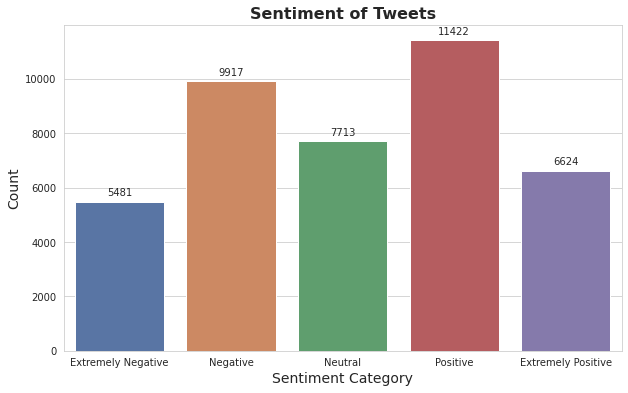

In [25]:
# Define a color palette using the 'color_palette' function from seaborn
colors = sns.color_palette('deep', n_colors=5)

# Set the figure size and style
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

# Create a countplot of the 'Sentiment' column in 'tweet_df'
# in order from most negative to most positive sentiment
sentiment_plot = sns.countplot(x='Sentiment', data=tweet_df, 
                               order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], 
                               palette=colors)

# Add annotations to the plot indicating the count of tweets for each sentiment category
for p in sentiment_plot.patches:
    sentiment_plot.annotate(format(p.get_height(), '.0f'), 
                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                             ha = 'center', va = 'center', xytext = (0,9), 
                             textcoords = 'offset points')

# Set the title and axis labels
plt.title("Sentiment of Tweets", fontsize=16, fontweight='bold')
plt.xlabel("Sentiment Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()

1. The specific chart was chosen because it effectively visualizes the distribution of tweet sentiment categories in a clear and concise manner.

2. The plot above shows the frequency of different sentiments present in the dataset. Positive sentiment has the highest occurrence, followed by negative, neutral, extremely positive and extremely negative sentiments.

3. The gained insights can potentially help create a positive business impact by providing a better understanding of how customers are feeling and responding to a brand or product. For example, a business could use this information to improve customer service and address any negative sentiment that may be impacting customer satisfaction. 

# **Class Distribution of Each Sentiment**

In [26]:
# Create a copy of the 'tweet_df' dataframe and assign it to the variable 'tt_df'
tt_df = tweet_df.copy()

In [27]:
# We are creating a new column called 'text' in the tt_df dataframe, which will contain the same values as the 'OriginalTweet' column.
tt_df['text'] = tt_df.OriginalTweet

# The 'astype' method is used to cast the values in the 'text' column as strings, to ensure they are all of the same data type.
# We pass the 'str' argument to specify that the values should be cast as strings.
tt_df["text"] = tt_df["text"].astype(str)

In [28]:
# Group the data by 'Sentiment', count the 'text' values in each group, and sort the results in descending order.
class_df = tt_df.groupby('Sentiment').count()['text'].sort_values(ascending=False)

# Reset the index of the DataFrame to start from 0.
class_df = class_df.reset_index()

# Apply a background gradient to the sorted DataFrame.
class_df.style.background_gradient(cmap='viridis')

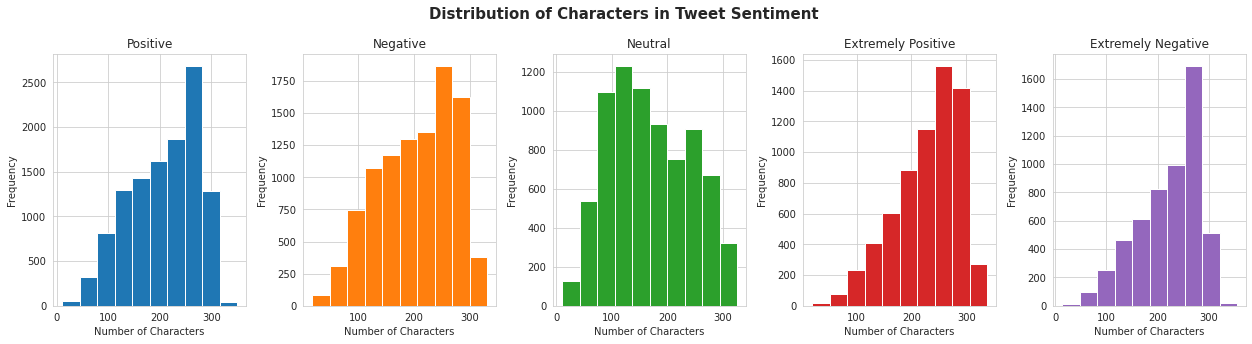

In [29]:
import matplotlib.pyplot as plt

# Define the list of sentiment types
sentiments = ['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']

# Create a figure with subplots for each sentiment type
fig, axs = plt.subplots(1, len(sentiments), figsize=(18, 5))

# Loop through the sentiment types and plot the histogram for each sentiment type
for i, sentiment in enumerate(sentiments):
    # Select the tweet texts with the current sentiment type
    tweet_texts = tt_df[tt_df['Sentiment'] == sentiment]['text']
    # Calculate the length of each tweet text
    tweet_lengths = [len(text) for text in tweet_texts]
    # Plot the histogram for the current sentiment type
    axs[i].hist(tweet_lengths, color='C{}'.format(i))
    axs[i].set_title(sentiment)
    axs[i].set_xlabel('Number of Characters')
    axs[i].set_ylabel('Frequency')

# Add a title to the figure
fig.suptitle('Distribution of Characters in Tweet Sentiment', size=15, fontweight='bold')

# Adjust the spacing between subplots and the margins of the figure
plt.subplots_adjust(wspace=0.3, left=0.06, right=0.98, top=0.85, bottom=0.15)

# Show the plot
plt.show()

The chart is a good choice to display the distribution of characters in tweet sentiment, as it shows the frequency of tweet text lengths for different sentiment types in a clear and easy-to-understand way. The use of subplots and different colors for each sentiment type allows for easy comparison between sentiment types.


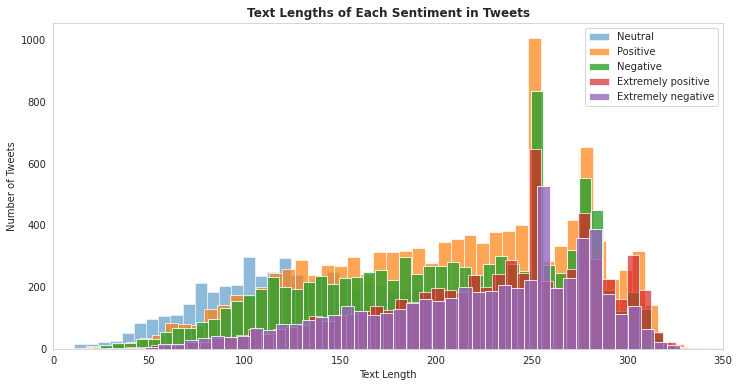

In [30]:
# Writing the function to calculate the length of text
def length(text):    
    '''A function which returns the length of text'''
    return len(text)

# Applying the length function to each row in the 'text' column and storing the results in a new column called 'length'
tt_df['length'] = tt_df['text'].apply(length)

# Setting the figure size
plt.rcParams['figure.figsize'] = (12, 6)

# Setting the number of bins for the histograms
bins = 50

# Plotting the histograms for each sentiment type
plt.hist(tt_df[tt_df['Sentiment'] == "Neutral"]['length'], alpha=0.5, bins=bins, label='Neutral')
plt.hist(tt_df[tt_df['Sentiment'] == "Positive"]['length'], alpha=0.7, bins=bins, label='Positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Negative"]['length'], alpha=0.8, bins=bins, label='Negative')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Positive"]['length'], alpha=0.7, bins=bins, label='Extremely positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Negative"]['length'], alpha=0.8, bins=bins, label='Extremely negative')

# Setting the plot title, x and y labels, legend, and axis limits
plt.title('Text Lengths of Each Sentiment in Tweets', fontweight='bold')
plt.xlabel('Text Length')
plt.ylabel('Number of Tweets')
plt.legend(loc='upper right')
plt.xlim(0, 350)
plt.grid()

# Displaying the plot
plt.show()

A histogram was used to visualize the distribution of tweet lengths for each sentiment type. 


# **The average length of words in a tweet.**

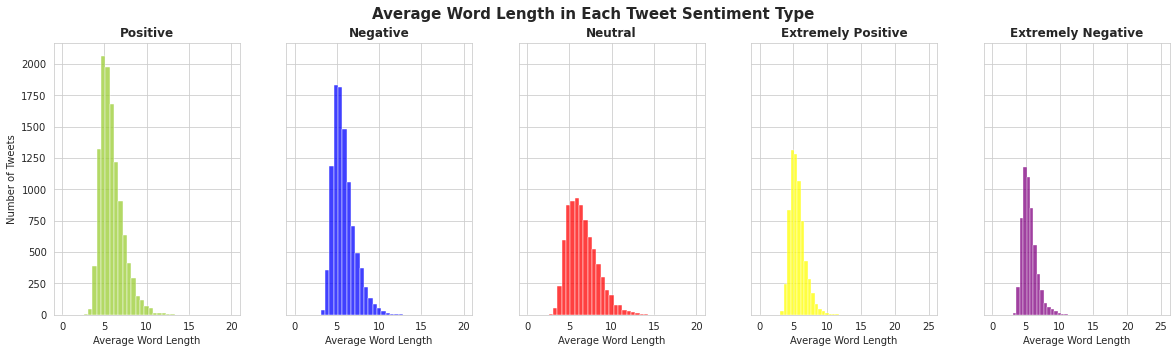

In [31]:
# Creating a function to calculate the average word length in a text
def avg_word_len(text):
    # Splitting the text into words
    words = text.split()
    # Calculating the length of each word
    word_lens = [len(word) for word in words]
    # Calculating the average word length
    if len(word_lens) == 0:
        return 0
    else:
        return np.mean(word_lens)

# Adding a new column to the dataframe with the average word length for each tweet
tt_df['avg_word_len'] = tt_df['text'].apply(avg_word_len)

# Defining the colors for each sentiment type
colors = {'Positive': 'yellowgreen', 
          'Negative': 'blue', 
          'Neutral': 'red', 
          'Extremely Positive': 'yellow', 
          'Extremely Negative': 'purple'}

# Defining the bin sizes for each sentiment type
bins = {'Positive': np.linspace(0, 20, 40), 
        'Negative': np.linspace(0, 20, 40), 
        'Neutral': np.linspace(0, 20, 40), 
        'Extremely Positive': np.linspace(0, 25, 50), 
        'Extremely Negative': np.linspace(0, 25, 50)}

# Creating subplots for each sentiment type
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Plotting the histograms for each sentiment type
for i, (sentiment, color) in enumerate(colors.items()):
    sns.histplot(tt_df[tt_df['Sentiment'] == sentiment]['avg_word_len'], ax=axes[i], color=color, bins=bins[sentiment], kde=False)
    axes[i].set_title(sentiment, fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Average Word Length', fontsize=10)
    if i == 0:
        axes[i].set_ylabel('Number of Tweets', fontsize=10)

# Setting the overall plot title
fig.suptitle('Average Word Length in Each Tweet Sentiment Type', fontweight='bold', fontsize=15)

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.25)

# Displaying the plot
plt.show()

1. The chart displays histograms for the average word length in each tweet sentiment type. 

2. The chart shows that the distribution of average word length varies by tweet sentiment type. Tweets with a positive sentiment tend to have longer average word lengths, while tweets with a neutral sentiment tend to have shorter average word lengths.

3. The gained insights can help businesses tailor their communication to better match customer sentiment. For example, if a business sees that neutral sentiment tweets have shorter average word lengths, they may want to focus on concise, straightforward communication in their responses to those tweets. 





# **Examining the relationship between the dates of tweets and the sentiments associated with them.**

In [32]:
pip install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 KB 499.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21069 sha256=9086fd283629b162b9c736ed1151555818bb51f7c56593ddda08dcbc5dabbe40
  Stored in directory: /root/.cache/pip/wheels/b1/98/ff/4885c231adf3d185efdc38cf8aa2527f1b255ca714a43cb125
Successfully built mplcursors


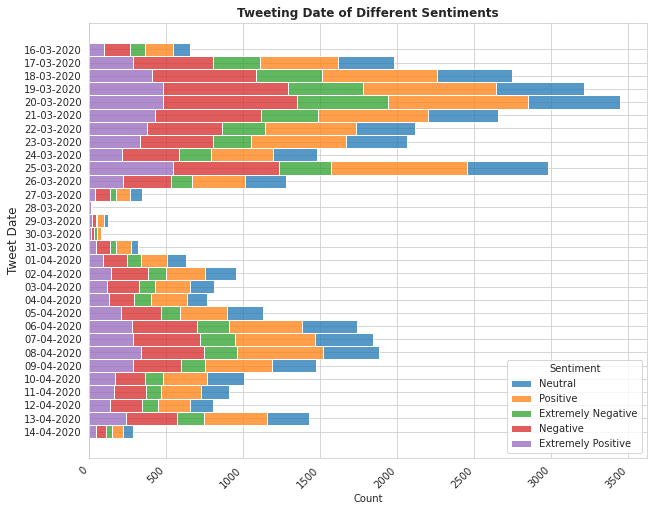

In [33]:
# set figure size for better visualization
plt.figure(figsize=(10,8))

# create stacked histogram of tweet dates with different sentiments
sns.histplot(data=tweet_df, y="TweetAt", hue="Sentiment", multiple="stack")

# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# set title and axis labels
plt.title("Tweeting Date of Different Sentiments", fontweight='bold')
plt.ylabel("Tweet Date", fontsize=12)

# display the plot
plt.show()

1. I chose a stacked histogram because it allows for the visualization of the frequency of each sentiment type by date. The stacked layout helps to easily compare the relative frequencies of each sentiment on each date.

2. The plot above shows the distribution of different sentiments by tweet date (TweetAt column). 

* It can be observed that the highest number of tweets were posted in the month of March 2020, when compared to April. 

* This period is especially notable due to the outbreak of COVID-19 cases from the month of March, which has caused fear and panic among many worldwide. 

* On 20 March 2020, the maximum number of tweets occurred, with positive sentiment being the most dominant, followed by negative sentiment. 

* On 25 March 2020, tweets with an extremely positive sentiment were most commonly posted, while those with an extremely negative sentiment were most prevalent on 20 March 2020. 

* The date of 28 March 2020 had the least number of tweets, as shown in the plot, with a corresponding low sentiment score.

# **Punctuations Available in Sentiments**

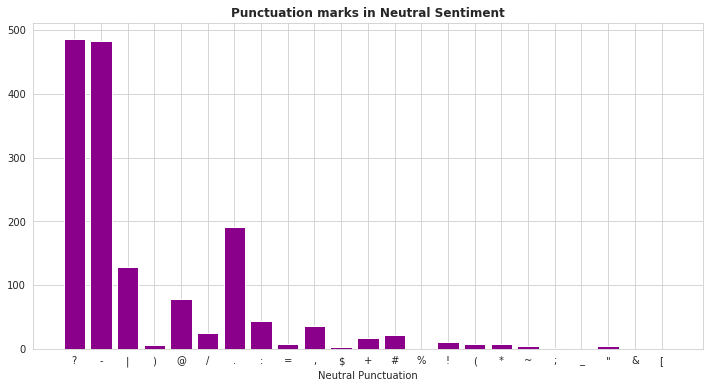

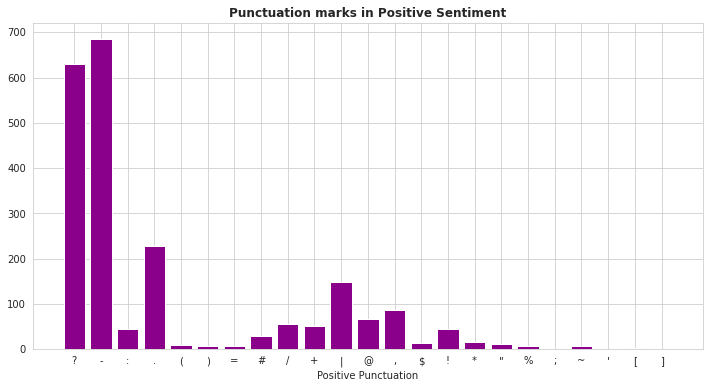

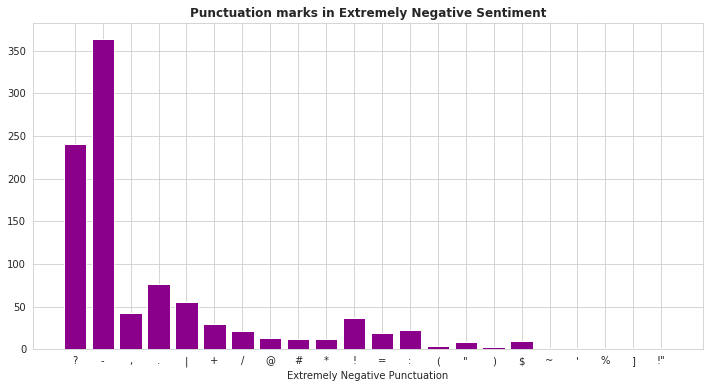

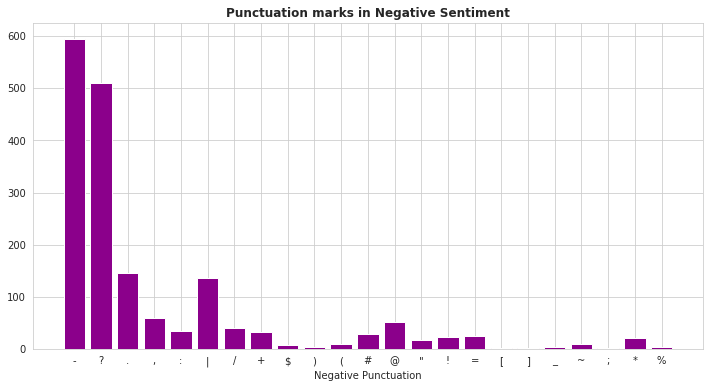

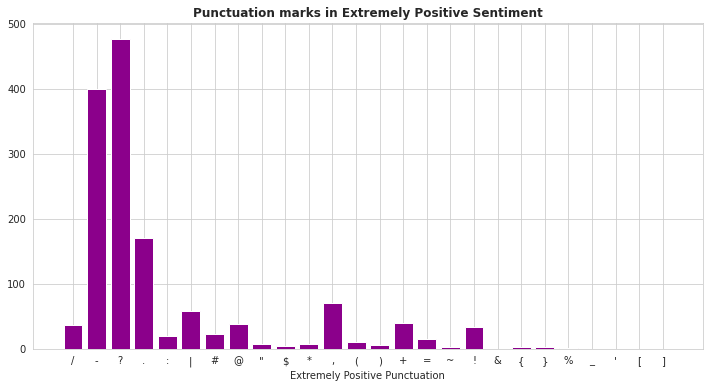

In [34]:
# Importing the required library
from collections import defaultdict
import string

# Define a function to create the corpus for a given sentiment
def create_corpus(sentiment):
    corpus=[]
    for x in tt_df[tt_df['Sentiment'] == sentiment]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

# Define a function to plot the punctuation marks for a given sentiment
def plot_punctuation(sentiment):
    corpus = create_corpus(sentiment)
    dic = defaultdict(int)
    special = string.punctuation
    for i in corpus:
        if i in special:
            dic[i] += 1
    x,y = zip(*dic.items())
    plt.bar(x, y, color='darkmagenta')
    plt.xlabel(f"{sentiment} Punctuation")
    plt.title(f"Punctuation marks in {sentiment} Sentiment", fontweight='bold')
    plt.show()

# Plot the punctuation marks for each sentiment
for sentiment in tt_df['Sentiment'].unique():
    plot_punctuation(sentiment)

The chart chosen is a bar chart, specifically a vertical bar chart, to display the frequency of each punctuation mark used in tweets for each sentiment. It is an appropriate choice because it effectively shows the differences in punctuation usage between the different sentiment types.

# **Tweets contain Mentions.**

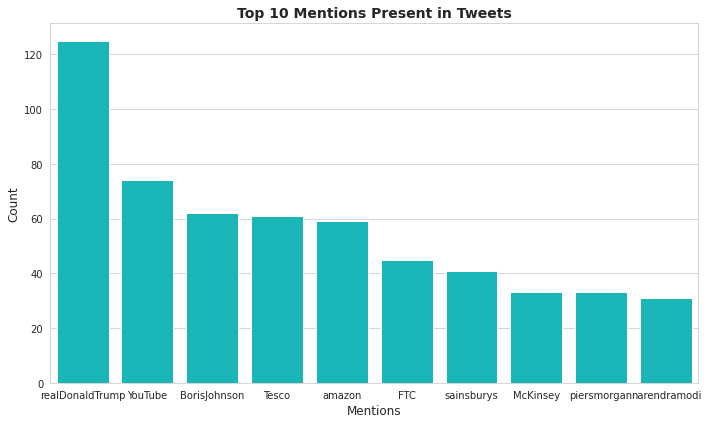

In [35]:
# Define a function to extract mentions from a text
def mentions(text):
    # Find all words in the input string that start with "@"
    line = re.findall(r'(?<=@)\w+', text)
    # Join the words together with spaces and return as a single string
    return " ".join(line)

# Create a new column in the dataset containing the mentions present in each tweet
tt_df['mentions'] = tt_df['text'].apply(lambda x: mentions(x))

# Count the occurrences of each mention and create a new dataframe with the top 10 mentions and their counts
temp = tt_df['mentions'].value_counts()[1:11].to_frame().reset_index().rename(columns={'index': 'Mentions', 'mentions': 'Count'})

# Create a bar plot showing the top 10 mentions and their counts
plt.figure(figsize=(10, 6)) # Set the size of the plot
sns.barplot(x="Mentions", y="Count", data=temp, color='darkturquoise') # Create the plot
plt.title("Top 10 Mentions Present in Tweets", fontweight='bold', fontsize=14) # Set the title
plt.xlabel("Mentions", fontsize=12) # Set the x-axis label
plt.ylabel("Count", fontsize=12) # Set the y-axis label
plt.tick_params(labelsize=10) # Set the font size of the tick labels
plt.tight_layout() # Adjust the layout to prevent overlap of plot elements
plt.show() # Display the plot

1. I picked a bar chart because it is an effective way to display categorical data with discrete values, which is what we have in this case with the top 10 mentions present in tweets.

2. The chart shows that the top 10 mentions present in tweets are 'realDonaldTrump', 'YouTube', 'BorisJohnson', 'Tesco', 'amazon', 'FTC', 'sainsburys', 'McKinsey', 'piersmorgan' and 'narendramodi'. 

3. The gained insights can help businesses to understand the most commonly discussed entities or users on Twitter and to potentially leverage this information for marketing or outreach purposes.

In [36]:
# Get top 10 mentions
b = tt_df['mentions'].value_counts()[:][1:11].index.tolist()
a = tt_df['mentions'].value_counts()[:][1:11].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a

# Set color palette
colors = px.colors.qualitative.Dark2

# Plot treemap
fig = px.treemap(row, path= ["scenario"], values="Percentage",
                 title='<b>Mentions<b>', width=1200, height=600,
                 color_discrete_sequence=colors)

# Set layout parameters
fig.update_layout(
    margin=dict(t=50, l=10, r=10, b=10),
    title={
        'font': {'size': 28},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font=dict(size=16),
    uniformtext=dict(minsize=16, mode='hide'),
    treemapcolorway=colors
)

fig.show()

1. I chose a treemap to visualize the top 10 mentions present in tweets because it is a space-efficient way of displaying hierarchical data. It is helpful for comparing the relative size of the different mentions.

2. The chart shows that the top 10 mentions present in tweets are 'realDonaldTrump', 'YouTube', 'BorisJohnson', 'Tesco', 'amazon', 'FTC', 'sainsburys', 'McKinsey', 'piersmorgan' and 'narendramodi'. This indicates that the majority of tweets are related to current affairs and high-profile individuals.

# **Length of OriginalTweet**

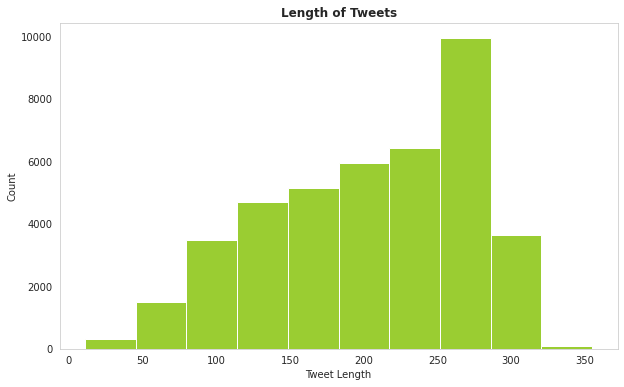

In [37]:
0# Set figure size
plt.figure(figsize=(10, 6))

# Add grid to plot
plt.grid()

# Plot histogram of tweet lengths using the 'str.len()' method of the pandas Series object
# This method returns the length of each string in the Series
plt.hist(tweet_df['OriginalTweet'].str.len(), color='yellowgreen')

# Add y-axis label
plt.ylabel('Count')

# Add x-axis label
plt.xlabel('Tweet Length')

# Add title to plot
plt.title('Length of Tweets', fontweight='bold')

# Show the plot
plt.show()

1. I chose a histogram because it is an effective way to visualize the distribution of a numerical variable.

2. The chart shows that most of the tweets are between 150 and arround 280 characters in length. 

## **Textual Data Preprocessing**

In [38]:
# create a copy of the original tweet_df DataFrame and store it in a new variable called twt_df
twt_df = tweet_df.copy()

### Remove @person character

In [39]:
# Define the remove_pattern function (as shown in the previous example)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Create a new column called "Clean_tweet" by applying the remove_pattern function to the "OriginalTweet" column
twt_df['Clean_tweet'] = np.vectorize(remove_pattern)(twt_df['OriginalTweet'], '@[\w]*')

# Display the first few rows of the DataFrame
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0     https://t.co/iFz9FAn2Pa and https://t.co/xX...  
1  advice Talk to your neighbours family to excha...  
2  Coronavirus Australia: Woolworths to give elde...  
3  My food stock is not the only one which is emp...  
4  Me, ready to go at supermarket during the #COV...

### Removing URLs from text data

In [40]:
# Use a lambda function with the "apply" method to split each text string by URLs and keep only the first part
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

# Display the first few rows of the DataFrame
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0                                                     
1  advice Talk to your neighbours family to excha...  
2  Coronavirus Australia: Woolworths to give elde...  
3  My food stock is not the only one which is emp...  
4  Me, ready to go at supermarket during the #COV...

### Removing special characters, numbers, and punctuations

In [41]:
# Use the "str.replace" method to replace any non-alphabetic characters, non-numeric characters, and non-hashtag symbols with a space
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')

# Display the first few rows of the DataFrame
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0                                                     
1  advice Talk to your neighbours family to excha...  
2  Coronavirus Australia Woolworths to give elder...  
3  My food stock is not the only one which is emp...  
4  Me ready to go at supermarket during the #COVI...

### Removing Short Words from Tweets

In [42]:
# Use the "str.replace" method with a regular expression to remove any words that are shorter than three characters
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].str.replace(r'\b\w{1,2}\b', '')

# Display the first few rows of the DataFrame
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0                                                     
1  advice Talk  your neighbours family  exchange ...  
2  Coronavirus Australia Woolworths  give elderly...  
3   food stock  not the only one which  empty PLE...  
4   ready    supermarket during the #COVID outbre...

### Converting all words to lowercase and removing stopwords

In [43]:
# Define a function to remove stopwords
def remove_stopwords(text):
    '''Function to remove stopwords'''
    # Import the stopwords from nltk library
    sw = stopwords.words('english')

    # Convert the text to lowercase and remove stopwords
    text = [word.lower() for word in text.split() if word.lower() not in sw]

    # Join the list of words with space separator 
    return " ".join(text)

# Apply the remove_stopwords function to the 'Clean_tweet' column of twt_df
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(remove_stopwords)

# Display the top 5 rows of the dataframe after removing stopwords
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0                                                     
1  advice talk neighbours family exchange phone n...  
2  coronavirus australia woolworths give elderly ...  
3  food stock one empty please panic enough food ...  
4  ready supermarket #covid outbreak paranoid foo...

### Stemming using SnowballStemmer

In [44]:
# Creating an object of SnowballStemmer
stemmer = SnowballStemmer("english")

# Defining a function to apply stemming to each word in the given text
def stemming(text):    
    '''A function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

# Applying stemming to the 'Clean_tweet' column of twt_df
twt_df['Clean_tweet'] = twt_df['Clean_tweet'].apply(stemming)

# Displaying the top 5 rows after stemming
twt_df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Clean_tweet  
0                                                     
1  advic talk neighbour famili exchang phone numb...  
2  coronavirus australia woolworth give elder dis...  
3  food stock one empti pleas panic enough food e...  
4  readi supermarket #covid outbreak paranoid foo...

## ***Hypothesis Testing***

### Hypothetical Statement - 1

Is there a correlation between tweet sentiment and tweet timing?

In [136]:
# Import necessary library
from scipy.stats import chi2_contingency

# Create a contingency table of tweet sentiment vs tweet timing
contingency_table = pd.crosstab(twt_df['Sentiment'], twt_df['TweetAt'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:\n", expected)

# Interpret the results
alpha = 0.05
if p_value < alpha:
  print("There is a significant relationship between tweet sentiment and tweet timing.")
else:
  print("There is no significant relationship between tweet sentiment and tweet timing.")

Chi-square statistic: 353.3694133000564
p-value: 8.25810169157818e-26
Degrees of freedom: 116
Expected values:
 [[ 83.89897223 127.04701509 107.87010715 102.14366936 150.6186311
  231.98731686 245.43778701 250.49835994 195.8974415  133.83883665
  121.05423136 106.93789635 190.17100372  37.82112399  87.36146949
  263.28296523 365.16028865 428.15110431 459.18040674 353.30789416
  281.52766237 274.60266783 197.09599825 396.72228297 170.06188498
   45.94467527   3.06297835  16.64662147  11.58604855  42.08265909]
 [101.39514542 153.54122021 130.36518697 123.44456593 182.02842773
  280.36562432 296.62103652 302.73693418 236.74961732 161.74939864
  146.29870982 129.23857424 229.82899628  45.70828778 105.57970698
  318.187623   441.31029958 517.43713099 554.93724032 426.98622349
  340.23704352 331.8679204  238.1981194  479.45418762 205.52635032
   55.52591297   3.70172753  20.11808441  14.00218675  50.85851738]
 [151.8018806  229.8714192  195.17384649 184.81276575 272.52051899
  419.74424764 4

**There is a significant relationship between tweet sentiment and tweet timing.**

### Hypothetical Statement - 2

Are there any particular locations where there is a concentration of negative tweets?

In [138]:
# Create a contingency table of negative tweet sentiment vs tweet location
neg_df = twt_df[twt_df['Sentiment'] == 'Negative']
contingency_table = pd.crosstab(neg_df['Sentiment'], neg_df['Location'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:\n", expected)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between negative tweet sentiment and tweet location.")
else:
    print("There is no significant relationship between negative tweet sentiment and tweet location.")

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0
Expected values:
 [[1. 1. 1. ... 2. 1. 1.]]
There is no significant relationship between negative tweet sentiment and tweet location.


**There is no significant relationship between negative tweet sentiment and tweet location.**

## **Generating a Story from Twitter Posts**

In [45]:
# function to collect hashtags
def hashtag_extract(x):
    """
    Extracts hashtags from a list of strings using a regular expression pattern and returns them as a nested list.
    """
    hashtags = []  # Initialize an empty list to hold the hashtags.

    for i in x:
        # Use the re.findall() method to extract hashtags from the current string and append them to the list.
        hashtags.append(re.findall(r'#(\w+)', i))

    return hashtags  # Return the list of extracted hashtags.

In [46]:
# Extract hashtags from tweets based on the sentiment of the tweet.
Htg_Extremely_Positive = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Extremely Positive'])
Htg_Positive = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Positive'])
Htg_Neutral = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Neutral'])
Htg_Negative = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Negative'])
Htg_Extremely_Negative = hashtag_extract(twt_df['OriginalTweet'][twt_df['Sentiment'] == 'Extremely Negative'])

In [47]:
# Unnest the nested list of hashtags for each sentiment and store them in separate variables
Htg_Extremely_Positive = sum(Htg_Extremely_Positive, [])
Htg_Positive = sum(Htg_Positive, [])
Htg_Neutral = sum(Htg_Neutral, [])
Htg_Negative = sum(Htg_Negative, [])
Htg_Extremely_Negative = sum(Htg_Extremely_Negative, [])

In [48]:
# Print the extracted hashtags for each sentiment category
print("Hashtags for Extremely Positive Tweets: ", Htg_Extremely_Positive)
print("Hashtags for Positive Tweets: ", Htg_Positive)
print("Hashtags for Neutral Tweets: ", Htg_Neutral)
print("Hashtags for Negative Tweets: ", Htg_Negative)
print("Hashtags for Extremely Negative Tweets: ", Htg_Extremely_Negative)

Hashtags for Extremely Positive Tweets:  ['horningsea', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'iptvnew', 'iptv2020', 'Adult', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'ipTv', '18Movies', 'consumer', 'covid19', 'tracker', 'BreakingNews', 'Breaking', 'Coronavirus', 'CoronavirusOutbreak', 'COVID19', 'COVID', 'COVID_19', 'COVID2019', 'Collapse', 'CoronavirusOutbreak', 'coronavirus', 'COVID2019', 'jlmco', 'jlmcobrand', 'coronapocolypse', 'coronavirus', 'CoronavirusOutbreak', 'COVID19', 'shoponline', 'coronavirus', 'COVID19', 'peoplearelosingtheirminds', 'StopTheMadness', 'stoppanicbuying', 'coronavirus', 'StopPanicBuying', 'BeKind', 'mufc', 'MUFC_Family', 'Malaysia2020', 'Mal

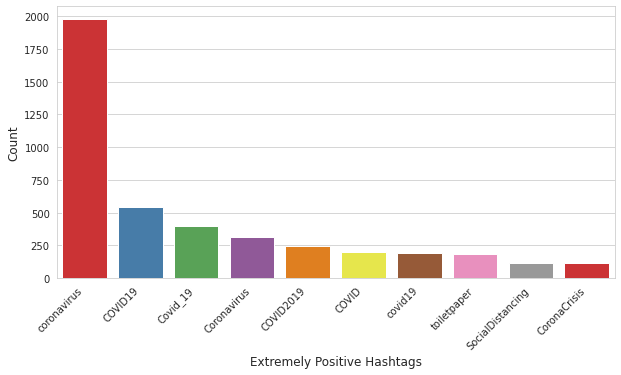

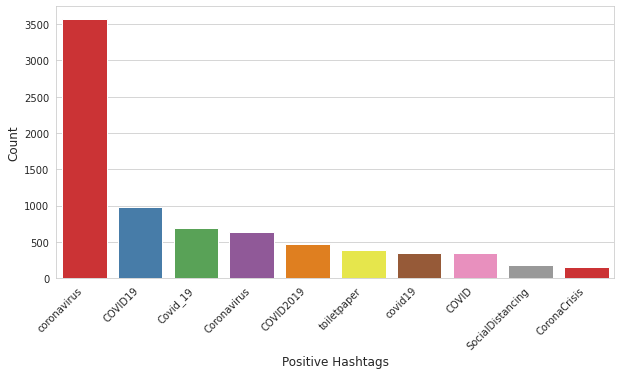

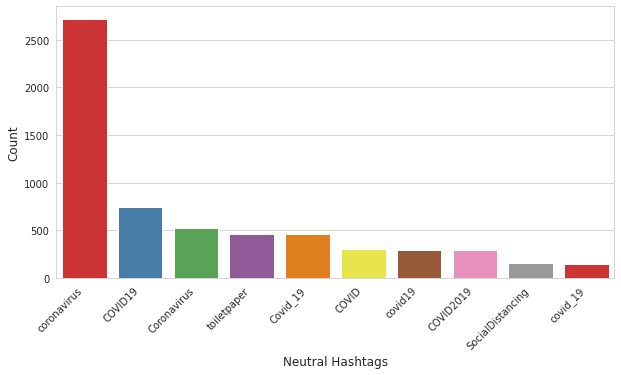

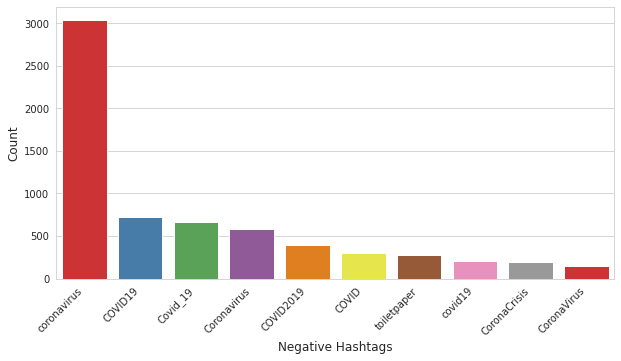

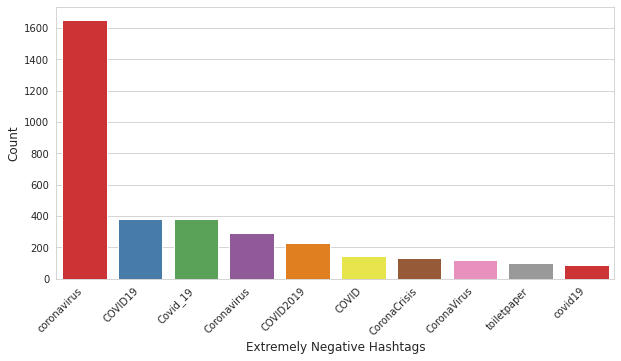

In [49]:
# create a list of all the sentiment categories
sentiments = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative']

# loop through each sentiment category and create a plot of its top hashtags
for sentiment in sentiments:
    # create a list of the hashtags for the current sentiment category
    hashtags = eval(f'Htg_{sentiment.replace(" ", "_")}')
    # create a frequency distribution of the hashtags
    freq_dist = nltk.FreqDist(hashtags)
    # get the top 10 hashtags
    top_hashtags = freq_dist.most_common(10)
    # create a dataframe of the top hashtags
    df = pd.DataFrame({'Hashtag': [hashtag[0] for hashtag in top_hashtags],
                       'Count': [hashtag[1] for hashtag in top_hashtags]})
    # create a bar plot of the top hashtags for the current sentiment category
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=df, x='Hashtag', y='Count', palette='Set1')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(f"{sentiment} Hashtags", fontsize=12)
    plt.show()

1. I chose the bar chart because it is an effective way to display the frequency of each hashtag in the top 10. The x-axis shows the hashtags and the y-axis shows their respective frequencies, allowing the viewer to quickly identify the most common hashtags.

2. The main insight from these bar plots is that the hashtag "Coronavirus" is the most commonly used across all sentiment categories. This suggests that the pandemic is a pervasive topic on Twitter and is being discussed regardless of the sentiment of the tweet.

* Additionally, we can see the top 10 hashtags for each sentiment category, which can provide further insight into the topics and issues that are associated with each sentiment.

* Overall, the charts suggest that the pandemic is a dominant topic on Twitter and is being discussed across all sentiment categories.

3. The insights gained from these charts could potentially help create a positive business impact by providing information on what people are talking about and how they feel about those topics. Businesses could use this information to tailor their marketing campaigns or improve their products or services to better meet the needs of their target audience.

## **Required Features**

In [50]:
# Create a new DataFrame with only the 'Clean_tweet' and 'Sentiment' columns from the original DataFrame
twt1_df = twt_df[['Clean_tweet', 'Sentiment']]

# Print the first 10 rows of the new DataFrame
twt1_df.head(10)

Clean_tweet           Sentiment
0                                                                Neutral
1  advic talk neighbour famili exchang phone numb...            Positive
2  coronavirus australia woolworth give elder dis...            Positive
3  food stock one empti pleas panic enough food e...            Positive
4  readi supermarket #covid outbreak paranoid foo...  Extremely Negative
5  news region first confirm covid case came sull...            Positive
6  cashier groceri store share insight #covid pro...            Positive
7  supermarket today buy toilet paper #rebel #toi...             Neutral
8  due covid retail store classroom atlanta open ...            Positive
9  corona prevent stop buy thing cash use onlin p...            Negative

In [51]:
# Import the Counter class from the collections module
from collections import Counter

# Create an instance of the Counter class
cnt = Counter()

# Loop through each tweet in the 'Clean_tweet' column of the twt1_df dataframe
for text in twt1_df.Clean_tweet.values:
  for word in text.split():  # Split the tweet into a list of individual words
    cnt[word] += 1 # Add the word to the Counter instance

# Print the 10 most common words and their counts
print(cnt.most_common(10))

[('#coronavirus', 14155), ('#covid', 10674), ('covid', 10574), ('price', 8911), ('store', 8207), ('supermarket', 7297), ('food', 6996), ('groceri', 6496), ('peopl', 5594), ('amp', 5115)]


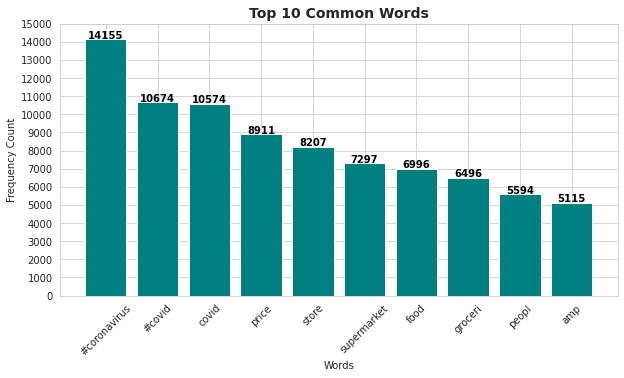

In [52]:
# Sort the words in descending order by their frequency count and select the top 10
com = sorted(cnt.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the words and their frequency counts as separate lists
x, y = zip(*com)

# Create a bar plot of the top 10 common words
plt.figure(figsize=(10, 5))
plt.bar(x, y, color='teal')

# Add chart title, x-axis and y-axis labels, and change the font weight of the title
plt.title('Top 10 Common Words', fontweight='bold', fontsize=14)
plt.xlabel('Words')
plt.ylabel('Frequency Count')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set the y-axis tick marks to start from 0 and increment by 1000
plt.yticks(np.arange(0, max(y)+1000, 1000))

# Add labels above each bar indicating the frequency count of the corresponding word
for i, v in enumerate(y):
  plt.text(i, v+50, str(v), color='black', ha='center', fontweight='bold')

# Show the plot
plt.show()

1. The specific chart used in the code is a bar chart. It was chosen to display the top 10 most common words used in the tweets, and their frequency count in a visually appealing and easy-to-understand way.

2. The insights gained from the chart are that the most frequently used hashtag is '#coronavirus' followed by '#covid', indicating that the pandemic and related topics were heavily discussed in the dataset.

* Other common words include 'price', 'store', 'supermarket', 'food', 'grocery', and 'people', which suggest that the dataset may contain discussions about the impact of the pandemic on consumer behavior, such as panic buying and the availability of essential goods.

3. The insights gained from the chart could potentially help businesses or individuals tailor their marketing strategy or communication style to align with the common topics or themes that people are talking about on Twitter.

## **Word Cloud**

In [53]:
# Importing the required libraries for Word Cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # library for creating word cloud
import matplotlib.pyplot as plt # library for data visualization
%matplotlib inline 
from PIL import Image # library for opening, manipulating and saving images
import os # library for interacting with operating system
from os import path # library for manipulating file paths

### Here, we are first representing the most common words in our dataset. Additionally, a word cloud for each sentiment is provided which helps us to analyze which words are used frequently for each sentiment.

In [54]:
# Selecting two columns 'Clean_tweet' and 'Sentiment' from twt_df and creating a new dataframe cld_df
cld_df = twt_df[['Clean_tweet', 'Sentiment']]

# Displaying the first few rows of the newly created dataframe
cld_df.head()

Clean_tweet           Sentiment
0                                                                Neutral
1  advic talk neighbour famili exchang phone numb...            Positive
2  coronavirus australia woolworth give elder dis...            Positive
3  food stock one empti pleas panic enough food e...            Positive
4  readi supermarket #covid outbreak paranoid foo...  Extremely Negative

In [55]:
# Creating a mapping of sentiment labels to numerical values from 0 to 4
sentiment_map = {"Extremely Negative": 4, "Negative": 3, "Neutral": 2, "Positive": 1, "Extremely Positive": 0}

# Using the mapping to replace sentiment labels with numerical values in the 'Sentiment' column of cld_df
cld_df['Sentiment'] = cld_df['Sentiment'].map(sentiment_map)

### Word Cloud of Cleaned Tweets

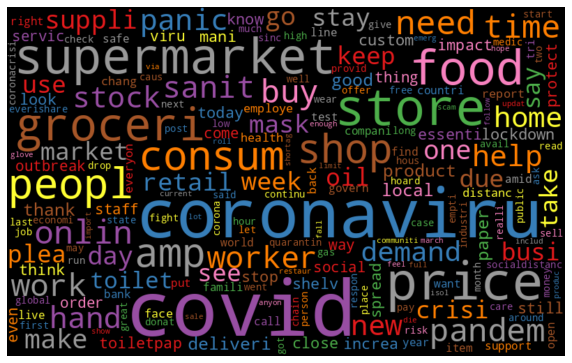

In [56]:
# Join all cleaned tweets into a single string
all_words = ' '.join([text for text in cld_df.Clean_tweet])

# Create a WordCloud object with various parameters
wordcloud = WordCloud(
    background_color="black",  # set background color to white
    width=800, height=500,  # set dimensions of the word cloud
    random_state=21,  # set a random state for reproducibility
    max_font_size=110,  # set maximum font size for the words
    stopwords=set(STOPWORDS),  # set stop words to be removed from the tweets
    colormap='Set1',  # set the color map for the word cloud
    collocations=False,  # disable collocations (i.e., groups of words that frequently occur together)
).generate(all_words)  # generate the word cloud based on the input string

# Create a figure and plot the word cloud
plt.figure(figsize=(10, 7))  # set the size of the plot
plt.imshow(wordcloud, interpolation="bilinear")  # plot the word cloud with bilinear interpolation
plt.axis('off')  # turn off the axis labels
plt.show()  # show the plot

1. I picked a WordCloud chart to visualize the most frequently occurring words in the cleaned tweets. WordClouds are a popular visualization technique for text data that allow us to easily identify the most common words or phrases.

2. From the WordCloud chart, we can see that the most common words in the cleaned tweets are related to the COVID-19 pandemic, such as "coronavirus", "covid", etc. Other frequently occurring words include "store", "help", "hand", "amp", "groceri", and "supermarket".

3. The gained insights can help businesses to understand the most common topics being discussed on social media related to the COVID-19 pandemic. This can be useful for businesses in the healthcare or pharmaceutical industries, as well as businesses that are impacted by the pandemic such as travel and hospitality. 

### Word Clouds for Each Sentiment Category

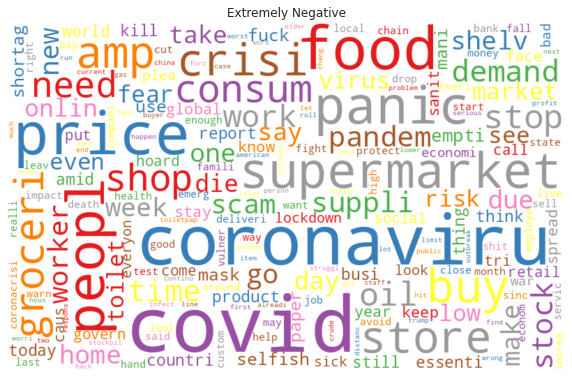

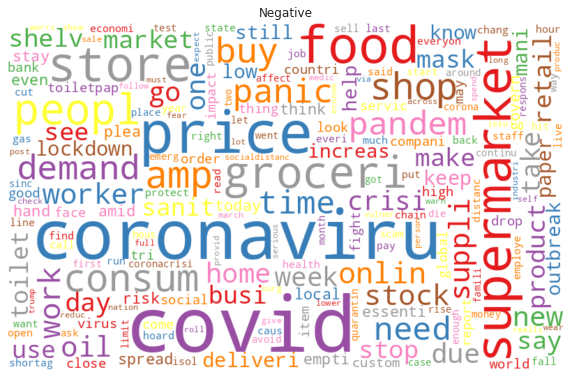

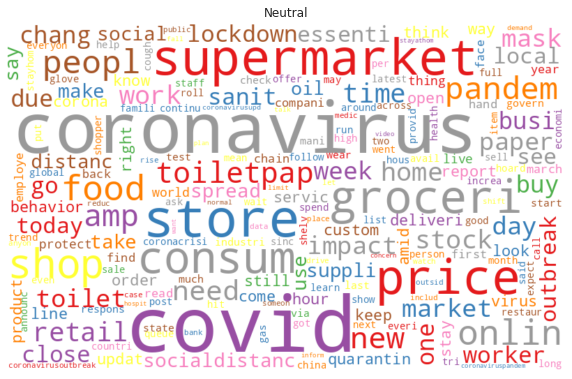

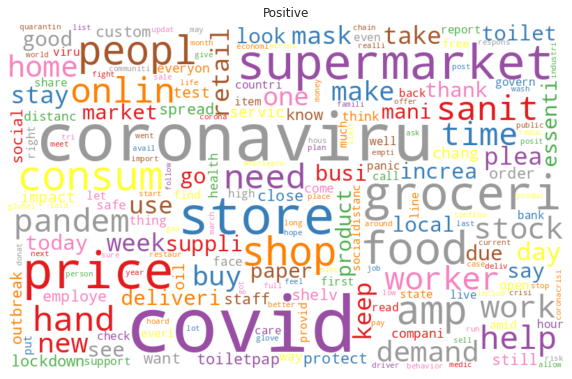

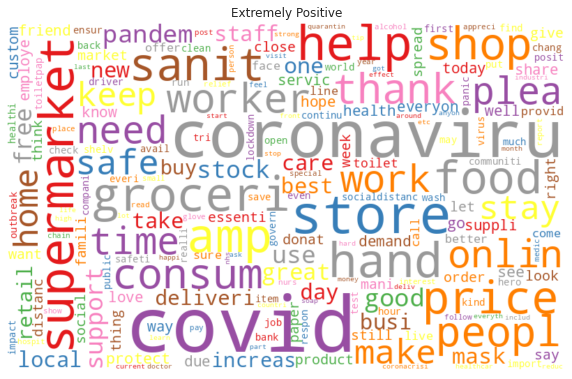

In [57]:
# Loop over each sentiment category
for sentiment, code in sentiment_map.items():
    # Filter the DataFrame by the current sentiment code
    sentiment_df = cld_df[cld_df['Sentiment'] == code]
    
    # Concatenate all tweets into a single string
    all_words = ' '.join([text for text in sentiment_df.Clean_tweet])
    
    # Generate a word cloud for the current sentiment category
    wordcloud = WordCloud(background_color="white", width=800, height=500, random_state=21,
                          max_font_size=110, stopwords=set(STOPWORDS), colormap='Set1',
                          collocations=False).generate(all_words)
    
    # Plot the word cloud for the current sentiment category
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(sentiment)
    plt.show()

1. The specific chart is a word cloud for each sentiment category, which displays the most frequently occurring words in the tweets associated with that sentiment category.

2. The insights from the charts can provide an understanding of the most common words associated with each sentiment category. 

3. The gained insights can definitely help create a positive business impact by providing insights into the sentiment of customers towards a brand or product. Businesses can use these insights to improve their products, customer service, and marketing strategies to better meet the needs and wants of their customers.

# **Feature Engineering**

### Feature Encoding

In [58]:
# Define a dictionary to map sentiment labels to numerical values
sentiment_map = {"Extremely Negative":-1, "Negative":-1, "Neutral":0, "Positive":1,"Extremely Positive":1}

# Use the 'map' method to apply the mapping to the 'Sentiment' column of the 'twt1_df' DataFrame
twt1_df['Sentiment'] = twt1_df['Sentiment'].map(sentiment_map)

In [59]:
# Use the 'head' method to display the first 5 rows of the 'twt1_df' DataFrame
twt1_df.head()

Clean_tweet  Sentiment
0                                                             0
1  advic talk neighbour famili exchang phone numb...          1
2  coronavirus australia woolworth give elder dis...          1
3  food stock one empti pleas panic enough food e...          1
4  readi supermarket #covid outbreak paranoid foo...         -1

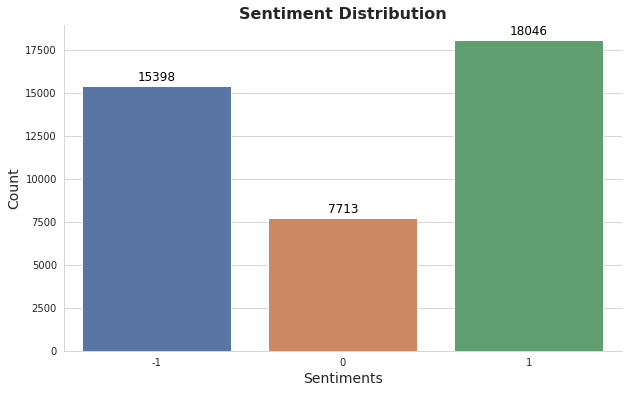

In [60]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a countplot of the encoded sentiment values
splot = sns.countplot(x='Sentiment', data=twt1_df, palette="deep")

# Add annotations to each bar in the plot
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0,9), 
                   textcoords = 'offset points', fontsize=12, color='black')

# Set the title, x-axis label, and y-axis label for the plot
plt.title("Sentiment Distribution", fontweight='bold', fontsize=16)
plt.xlabel("Sentiments",fontsize=14)
plt.ylabel("Count", fontsize = 14)

# Remove the top and right spines from the plot
sns.despine()

# Display the plot
plt.show()

1. I picked a countplot to visualize the distribution of the encoded sentiment values in the dataframe because it is great for displaying the frequency of values in a categorical dataset, and it helps to quickly identify the most common sentiment among the tweets.

2. From the chart, we can see that the majority of the tweets in the dataset are classified as positive, followed by negative and neutral sentiments. 


## **Extracting Features from Cleaned Tweets**

### Multiclass Sentiment

In [61]:
# Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer # For converting text into a numerical representation
from sklearn.model_selection import train_test_split, cross_val_score # For splitting data into train and test sets, and performing cross-validation
from sklearn.naive_bayes import MultinomialNB # For using the Naive Bayes algorithm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, precision_score, recall_score # For evaluating the performance of the model
from sklearn.metrics import f1_score #The f1_score function computes the F1 score, which is the harmonic mean of precision and recall, for each class
from sklearn.linear_model import LogisticRegression # For using Logistic Regression algorithm
from sklearn.ensemble import RandomForestClassifier # For using Random Forest algorithm
from sklearn.preprocessing import StandardScaler # For scaling the data to improve model performance

In [62]:
# Display information about the twt1_df DataFrame
twt1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clean_tweet  41157 non-null  object
 1   Sentiment    41157 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 643.2+ KB


In [63]:
# Display the shape of the twt1_df DataFrame
twt1_df.shape

(41157, 2)

In [64]:
# Check for null values in the twt1_df DataFrame and display the total number of null values for each column
twt1_df.isnull().sum()

Clean_tweet    0
Sentiment      0
dtype: int64

In [65]:
# Display the first few rows of the twt1_df DataFrame
twt1_df.head()

Clean_tweet  Sentiment
0                                                             0
1  advic talk neighbour famili exchang phone numb...          1
2  coronavirus australia woolworth give elder dis...          1
3  food stock one empti pleas panic enough food e...          1
4  readi supermarket #covid outbreak paranoid foo...         -1

It can be concluded that our dataset is clean and ready for model development as there are no nan/null values present.

### Data Splitting

In [66]:
# Split the twt1_df DataFrame into training and validation sets with the same proportions of class labels as the input dataset
train, valid = train_test_split(twt1_df, test_size=0.2, random_state=0, stratify=twt1_df.Sentiment.values)

# Print the shape of the training and validation sets
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


### Counter Vectorizer for Multi Class Classification

In [67]:
# Create a list of stopwords and a CountVectorizer object
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error='replace', stop_words=stop)

# Transform the training and validation data into bag-of-words vectors
X_train = vectorizer.fit_transform(train.Clean_tweet.values)
X_valid = vectorizer.transform(valid.Clean_tweet.values)

# Get the labels for the training and validation sets
y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

# Print the shapes of the training and validation sets
print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 26925)
X_valid.shape :  (8232, 26925)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


## ***ML Model Implementation***

In [68]:
# Import matplotlib, set plot size and define label names
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
labels = ['Negative', 'Neutral', 'Positive']

### 1. Naive Bayes Classifier for multiclass classification

In [69]:
# Create a new Naive Bayes classifier object
naiveByes_clf = MultinomialNB()

# Fit the model to the training data
naiveByes_clf.fit(X_train,y_train)

MultinomialNB()

In [70]:
# Predict class labels for the validation and training sets
y_pred_NB_valid = naiveByes_clf.predict(X_valid)
y_pred_NB_train = naiveByes_clf.predict(X_train)

# Compute accuracy of predictions on validation set
NB_accuracy = accuracy_score(y_valid,y_pred_NB_valid)

# Print the train and validation accuracy scores, and classification report of validation set
print("Train accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(y_pred_NB_valid,y_valid))

Train accuracy Score    :  0.7802885345482157
Validation accuracy Score :  0.6842808551992225
              precision    recall  f1-score   support

          -1       0.76      0.68      0.72      3443
           0       0.26      0.70      0.38       580
           1       0.80      0.69      0.74      4209

    accuracy                           0.68      8232
   macro avg       0.61      0.69      0.61      8232
weighted avg       0.75      0.68      0.70      8232



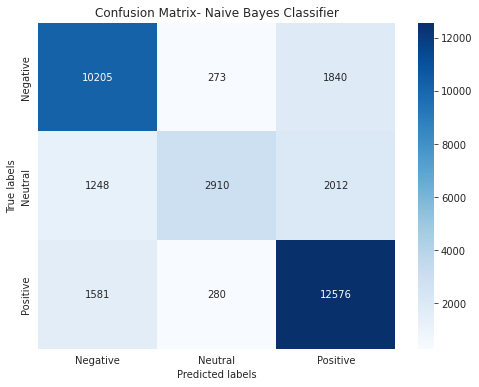

In [71]:
# Confusion Matrix for train dataset
cm = confusion_matrix(y_train,y_pred_NB_train)

# Creating a subplot
ax= plt.subplot()

# Creating a heatmap to visualize the confusion matrix using seaborn library
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

# Setting labels, title and ticks for the heatmap
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Naive Bayes Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Displaying the heatmap
plt.show()

A heatmap was chosen to visualize the confusion matrix because it provides a clear and concise way of identifying the distribution of predicted labels compared to the actual labels.



In [72]:
# Calculating precision, recall, and f1-score for Naive Bayes Classifier
NB_precision = precision_score(y_pred_NB_valid,y_valid, average ='weighted')
NB_recall = recall_score(y_pred_NB_valid,y_valid,average ='weighted')
NB_f1_score = f1_score(y_pred_NB_valid,y_valid,average ='weighted')

# Printing the performance metrics
print("Precision Score (weighted):", NB_precision)
print("Recall Score (weighted):", NB_recall)
print("F1 Score (weighted):", NB_f1_score)

Precision Score (weighted): 0.7451988716680938
Recall Score (weighted): 0.6842808551992225
F1 Score (weighted): 0.7045735328410196


## **2. Stochastic Gradient Descent (SGD)**

In [73]:
# Importing necessary libraries
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# Initializing the SGDClassifier
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', random_state=0)

# Setting up the grid of hyperparameters to be tuned
param_grid = {}

# Setting up GridSearchCV with SGDClassifier, hyperparameter grid, verbose output, and 5-fold cross-validation
grid_sgd = GridSearchCV(sgd_clf, param_grid, verbose=3, cv=5)

# Fitting the GridSearchCV on the training data
grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.799 total time=   0.6s
[CV 2/5] END ..................................., score=0.811 total time=   0.9s
[CV 3/5] END ..................................., score=0.805 total time=   0.6s
[CV 4/5] END ..................................., score=0.800 total time=   0.7s
[CV 5/5] END ..................................., score=0.803 total time=   0.7s


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0), param_grid={},
             verbose=3)

In [74]:
# Prediction using the fitted model
y_pred_sgd_valid = grid_sgd.predict(X_valid)
y_pred_sgd_train = grid_sgd.predict(X_train)

# Checking accuracy and printing classification report
sgd_accuracy = accuracy_score(y_valid,y_pred_sgd_valid)

# Printing Train and Validation accuracy score
print("Train accuracy Score : ",grid_sgd.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )

# Printing classification report to check precision, recall and f1-score for each class
print(classification_report(y_pred_sgd_valid,y_valid))

Train accuracy Score :  0.9162642369020502
Validation accuracy Score :  0.8107385811467445
              precision    recall  f1-score   support

          -1       0.81      0.83      0.82      3034
           0       0.73      0.71      0.72      1586
           1       0.84      0.84      0.84      3612

    accuracy                           0.81      8232
   macro avg       0.79      0.79      0.79      8232
weighted avg       0.81      0.81      0.81      8232



[[11363   327   628]
 [  370  5353   447]
 [  599   386 13452]]


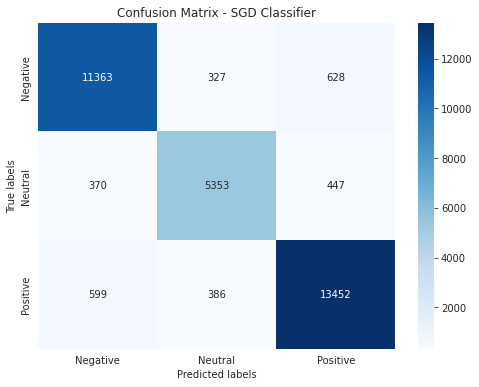

In [75]:
# Creating confusion matrix for the train dataset
cm1 = confusion_matrix(y_train, y_pred_sgd_train)
print(cm1)

# Creating a subplot
ax= plt.subplot()

# Creating a heatmap to visualize the confusion matrix using seaborn library
sns.heatmap(cm1, annot=True, ax = ax, cmap='Blues', fmt='g')

# Setting labels, title and ticks for the heatmap
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SGD Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Displaying the heatmap
plt.show()

A heatmap was chosen to visualize the confusion matrix

In [76]:
# Calculate the model performance metrics for the SGD Classifier model

# Precision: fraction of correctly predicted instances among the total predicted instances
sgd_precision = precision_score(y_pred_sgd_valid, y_valid, average ='weighted')

# Recall: fraction of correctly predicted instances among the total actual instances
sgd_recall = recall_score(y_pred_sgd_valid, y_valid, average ='weighted')

# F1 Score: harmonic mean of precision and recall, provides a balance between precision and recall
sgd_f1_score = f1_score(y_pred_sgd_valid, y_valid, average ='weighted')

# Print the calculated performance metrics
print("SGD Classifier Model Performance Metrics:")
print("Precision:", sgd_precision)
print("Recall:", sgd_recall)
print("F1 Score:", sgd_f1_score)

SGD Classifier Model Performance Metrics:
Precision: 0.8102907946822737
Recall: 0.8107385811467445
F1 Score: 0.8104714312013939


## **3. Random Forest Classifier**

In [77]:
# import the necessary library
from sklearn.ensemble import RandomForestClassifier

In [78]:
# Defining a grid of parameter values to be searched over
param_grid = {'n_estimators': [60,80,100],
'max_depth': [100,200,300]}

# Creating a Random Forest Classifier instance
rf_clf = RandomForestClassifier()

# Defining the Grid Search Cross Validation
grid_rf = GridSearchCV(rf_clf, param_grid, verbose=3, cv=5, scoring='accuracy')

# Fitting the model to the training data
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....max_depth=100, n_estimators=60;, score=0.695 total time=  40.0s
[CV 2/5] END ....max_depth=100, n_estimators=60;, score=0.709 total time=  44.7s
[CV 3/5] END ....max_depth=100, n_estimators=60;, score=0.711 total time=  49.6s
[CV 4/5] END ....max_depth=100, n_estimators=60;, score=0.699 total time=  37.3s
[CV 5/5] END ....max_depth=100, n_estimators=60;, score=0.704 total time=  56.9s
[CV 1/5] END ....max_depth=100, n_estimators=80;, score=0.713 total time=  49.0s
[CV 2/5] END ....max_depth=100, n_estimators=80;, score=0.712 total time=  58.8s
[CV 3/5] END ....max_depth=100, n_estimators=80;, score=0.719 total time=  55.2s
[CV 4/5] END ....max_depth=100, n_estimators=80;, score=0.701 total time=  50.3s
[CV 5/5] END ....max_depth=100, n_estimators=80;, score=0.714 total time=  54.4s
[CV 1/5] END ...max_depth=100, n_estimators=100;, score=0.717 total time= 1.4min
[CV 2/5] END ...max_depth=100, n_estimators=100;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [100, 200, 300],
                         'n_estimators': [60, 80, 100]},
             scoring='accuracy', verbose=3)

In [87]:
# Printing the best parameter values found by GridSearchCV
print(grid_rf.best_params_)

# Printing the best estimator model found by GridSearchCV
print(grid_rf.best_estimator_)

{'max_depth': 300, 'n_estimators': 100}
RandomForestClassifier(max_depth=300)


In [97]:
# Predicting on training and validation set
y_pred_rf_train = grid_rf.predict(X_train)
y_pred_rf_valid = grid_rf.predict(X_valid)

# Calculating accuracy and printing classification report
rf_train_accuracy = accuracy_score(y_train, y_pred_rf_train)
rf_valid_accuracy = accuracy_score(y_valid, y_pred_rf_valid)
print("Training accuracy Score : ", rf_train_accuracy)
print("Validation accuracy Score : ", rf_valid_accuracy)
print(classification_report(y_valid, y_pred_rf_valid))

Training accuracy Score :  0.9907061503416856
Validation accuracy Score :  0.766156462585034
              precision    recall  f1-score   support

          -1       0.80      0.74      0.77      3080
           0       0.67      0.70      0.68      1543
           1       0.78      0.82      0.80      3609

    accuracy                           0.77      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.77      0.77      0.77      8232



[[12180   135     3]
 [    2  6167     1]
 [    4   161 14272]]


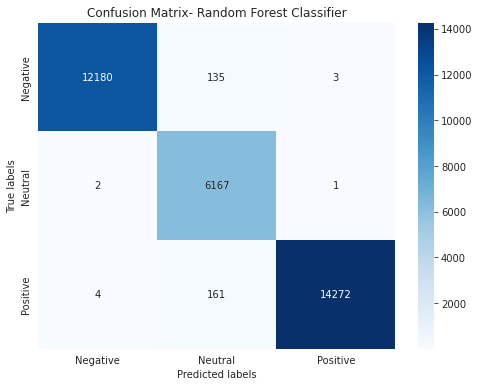

In [103]:
# Confusion Matrix
cm2 = confusion_matrix(y_train, y_pred_rf_train)
print(cm2)

# Plot the heatmap
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax, cmap="Blues" , fmt = "g") #annot=True to annotate cells

# Set the labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Show the plot
plt.show()

A heatmap was chosen to visualize the confusion matrix

In [105]:
# Model Performance

# calculate precision, recall, and f1-score for Random Forest classifier
rf_precision = precision_score(y_pred_rf_valid, y_valid, average='weighted')
rf_recall = recall_score(y_pred_rf_valid, y_valid, average='weighted')
rf_f1_score = f1_score(y_pred_rf_valid, y_valid, average='weighted')

#print the values
print(f"Random Forest Classifier Performance: \nPrecision: {rf_precision}, Recall: {rf_recall}, F1-Score: {rf_f1_score}")

Random Forest Classifier Performance: 
Precision: 0.7671176691669648, Recall: 0.766156462585034, F1-Score: 0.7661284029938397


## **4. Support Vector Machine**

In [106]:
# Importing the required library
from sklearn.svm import SVC

In [107]:
# Instantiate an SVC object with linear kernel and verbose output
svc_clf = SVC(kernel='linear', verbose=3)

# Fit the model on the training dataset
svc_clf.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', verbose=3)

In [108]:
# Get the predicted classes
y_pred_svc_train = svc_clf.predict(X_train)
y_pred_svc_valid = svc_clf.predict(X_valid)

# Model performance on train and validation sets
svc_accuracy = accuracy_score(y_valid, y_pred_svc_valid)
print("Training accuracy Score : ",svc_clf.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(y_pred_svc_valid,y_valid))

Training accuracy Score :  0.9517691723614274
Validation accuracy Score :  0.7938532555879495
              precision    recall  f1-score   support

          -1       0.81      0.80      0.80      3123
           0       0.70      0.69      0.70      1553
           1       0.82      0.84      0.83      3556

    accuracy                           0.79      8232
   macro avg       0.78      0.77      0.78      8232
weighted avg       0.79      0.79      0.79      8232



[[11796   175   347]
 [  231  5704   235]
 [  370   230 13837]]


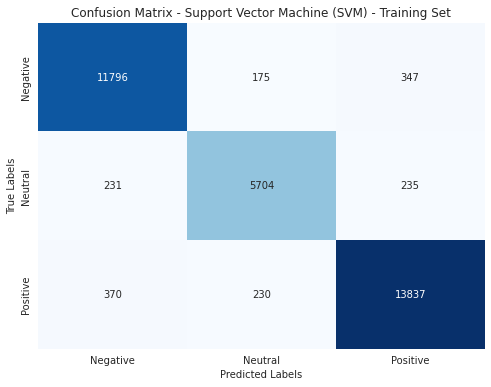

In [109]:
# Confusion Matrix
cm_svc_train = confusion_matrix(y_train, y_pred_svc_train)
print(cm_svc_train)

# Plot the heatmap of the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_svc_train, annot=True, fmt="d", cmap="Blues",
xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Support Vector Machine (SVM) - Training Set")

# Show the plot
plt.show()

A heatmap was chosen to visualize the confusion matrix

In [110]:
# Model Performance 
svc_precision = precision_score(y_pred_svc_valid, y_valid, average ='weighted')
svc_recall = recall_score(y_pred_svc_valid, y_valid, average ='weighted')
svc_f1_score = f1_score(y_pred_svc_valid, y_valid, average ='weighted')

print("Precision score: ", svc_precision)
print("Recall score: ", svc_recall)
print("F1 score: ", svc_f1_score)

Precision score:  0.7936058383774872
Recall score:  0.7938532555879495
F1 score:  0.7936939482056544


## **5. Logistic Regression**

In [89]:
# Instantiate the Logistic Regression model
logistic = LogisticRegression()

## Set the hyperparameters
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500, 1000] }

# Fit the hyperparameters with Cross Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, verbose = 3, cv = 5)

# Train the model
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500,
                               1000],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [90]:
# Print the best mean cross-validated score achieved by the GridSearchCV object
print(grid_lr.best_score_)

# Print the best set of hyperparameters that yielded the best mean cross-validated score
print(grid_lr.best_params_)

0.7935307517084282
{'C': 0.5, 'penalty': 'l2'}


In [91]:
# Use the fitted grid search object to make predictions on the training and validation sets
y_pred_lr_train = grid_lr.predict(X_train)
y_pred_lr_valid = grid_lr.predict(X_valid)

# Compute the accuracy of the predictions on the validation set
lr_accuracy = accuracy_score(y_valid, y_pred_lr_valid)

# Print the training and validation accuracy scores
print("Training accuracy Score    : ", grid_lr.score(X_train, y_train))
print("Validation accuracy Score : ", lr_accuracy)

# Print the classification report for the validation set
print(classification_report(y_pred_lr_valid, y_valid))

Training accuracy Score    :  0.9175398633257403
Validation accuracy Score :  0.798955296404276
              precision    recall  f1-score   support

          -1       0.81      0.82      0.81      3057
           0       0.70      0.69      0.69      1581
           1       0.83      0.83      0.83      3594

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



[[11369   332   617]
 [  356  5365   449]
 [  584   377 13476]]


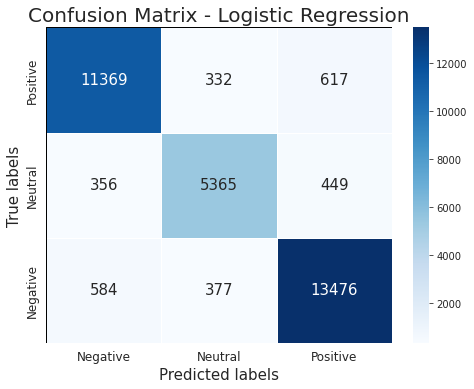

In [92]:
# Compute the confusion matrix for the training set
cm4 = confusion_matrix(y_train, y_pred_lr_train)

# Print the confusion matrix
print(cm4)

# Create a heatmap of the confusion matrix using seaborn
ax = plt.subplot()
sns.heatmap(cm4, annot=True, cmap='Blues', fmt='g', ax=ax, linewidths=0.5, annot_kws={"fontsize":15}) # annot=True to annotate cells; cmap='Blues' for blue color scheme
# fmt='g' to remove scientific notation; linewidths=0.5 to add separation between cells
# annot_kws={"fontsize":15} to increase the font size of the annotations

# Set the labels, title, and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('True labels', fontsize=15)
ax.set_title('Confusion Matrix - Logistic Regression', fontsize=20)
ax.xaxis.set_ticklabels(labels, fontsize=12)
ax.yaxis.set_ticklabels(labels[::-1], fontsize=12) # Reverse the labels to match the orientation of the confusion matrix

# Add horizontal and vertical lines to clearly separate the different classes
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=3, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=3, color='k',linewidth=1)

# Adjust the layout to make the plot look more compact
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.show()

A heatmap was chosen to visualize the confusion matrix

In [93]:
# Compute precision, recall, and F1 score for the logistic regression model using the predicted labels and true labels
lr_precision = precision_score(y_pred_lr_valid, y_valid, average='weighted')
lr_recall = recall_score(y_pred_lr_valid, y_valid, average='weighted')
lr_f1_score = f1_score(y_pred_lr_valid, y_valid, average='weighted')

# Print the precision, recall, and F1 score to the console
print("Precision Score: ", lr_precision)
print("Recall Score: ", lr_recall)
print("F1 Score: ", lr_f1_score)

Precision Score:  0.7984212873879533
Recall Score:  0.798955296404276
F1 Score:  0.7986627511531555


## **6. CatBoost**

In [94]:
# Installing CatBoost using pip
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.1 MB/s eta 0:00:00


In [95]:
# Import the required libraries
from catboost import CatBoostClassifier, Pool, cv

# CatBoostClassifier is the main class for training and predicting with CatBoost
# Pool is a class that stores the data to be used for training or prediction
# cv is a function used for cross-validation with CatBoost

In [111]:
# Instantiate a CatBoostClassifier object
clf2 = CatBoostClassifier()

# Fit the model on the training data using the fit method
# The eval_set parameter specifies the validation set to monitor the performance of the model during training
# The verbose parameter controls the amount of logging output during training
clf2.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

# Check if the model is fitted using the is_fitted method
print('CatBoost model is fitted: ' + str(clf2.is_fitted()))

# Print the model parameters using the get_params method
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [112]:
# Use the predict method of the CatBoostClassifier object to make predictions on the validation and training data
y_pred_cb_valid = clf2.predict(X_valid)
y_pred_cb_train = clf2.predict(X_train)

# Calculate the accuracy of the model on the validation data using the accuracy_score method from scikit-learn
catboost_accuracy = accuracy_score(y_valid, y_pred_cb_valid)

# Print the training and validation accuracy scores and the classification report
print("Training accuracy Score    : ", clf2.score(X_train, y_train))
print("Validation accuracy Score : ", catboost_accuracy)
print(classification_report(y_pred_cb_valid, y_valid))

Training accuracy Score    :  0.8294305239179954
Validation accuracy Score :  0.8092808551992225
              precision    recall  f1-score   support

          -1       0.79      0.84      0.82      2921
           0       0.78      0.70      0.74      1714
           1       0.84      0.84      0.84      3597

    accuracy                           0.81      8232
   macro avg       0.80      0.79      0.80      8232
weighted avg       0.81      0.81      0.81      8232



[[10057   906  1355]
 [  522  4907   741]
 [ 1203   889 12345]]


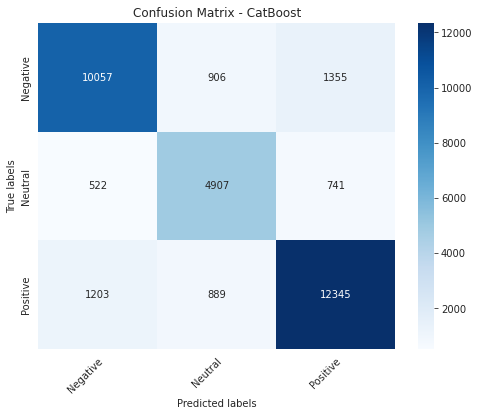

In [113]:
# Calculate the confusion matrix using the confusion_matrix method from scikit-learn
cm5 = confusion_matrix(y_train, y_pred_cb_train)
print(cm5)

# Plot the confusion matrix using seaborn's heatmap function
ax = plt.subplot()
sns.heatmap(cm5, annot=True, cmap='Blues', fmt='g', ax=ax) # Set the annotation, color map, and number format

# Set the axis labels, title, and tick labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - CatBoost')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Rotate the tick labels to make them more readable
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add a color bar to show the scale of the values
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

A heatmap was chosen to visualize the confusion matrix

In [114]:
# Calculate the precision, recall, and F1 score for the CatBoost model's predictions on the validation set
cb_precision = precision_score(y_pred_cb_valid, y_valid, average='weighted')
cb_recall = recall_score(y_pred_cb_valid, y_valid, average='weighted')
cb_f1_score = f1_score(y_pred_cb_valid, y_valid, average='weighted')

# Print the results
print('Precision:', cb_precision)
print('Recall:', cb_recall)
print('F1 Score:', cb_f1_score)

Precision: 0.8088786011209814
Recall: 0.8092808551992225
F1 Score: 0.8084514192638385


# ***Summary of All Models***

In [132]:
# Summary of All Models

# Creating a dataframe which contains evaluation metrics of all the models.
model_test = pd.DataFrame({
'Model': ['Support Vector Machines', 'Logistic Regression','Random Forest', 'Naive Bayes','Stochastic Gradient Decent','CatBoost'],
'Test accuracy': [svc_accuracy, lr_accuracy,rf_valid_accuracy, NB_accuracy,sgd_accuracy,catboost_accuracy],
'Recall': [svc_recall, lr_recall, rf_recall, NB_recall, sgd_recall, cb_recall],
'Precision': [svc_precision, lr_precision, rf_precision, NB_precision, sgd_precision, cb_precision],
'F1-Score': [svc_f1_score, lr_f1_score, rf_f1_score, NB_f1_score, sgd_f1_score, cb_f1_score]
})

# Sorting the models by their test accuracy score in descending order.
model_test = model_test.sort_values(by='Test accuracy', ascending=False).reset_index(drop=True)
model_test

Model  Test accuracy    Recall  Precision  F1-Score
0  Stochastic Gradient Decent       0.810739  0.810739   0.810291  0.810471
1                    CatBoost       0.809281  0.809281   0.808879  0.808451
2         Logistic Regression       0.798955  0.798955   0.798421  0.798663
3     Support Vector Machines       0.793853  0.793853   0.793606  0.793694
4               Random Forest       0.766156  0.766156   0.767118  0.766128
5                 Naive Bayes       0.684281  0.684281   0.745199  0.704574

### Test Accuracy of the Models

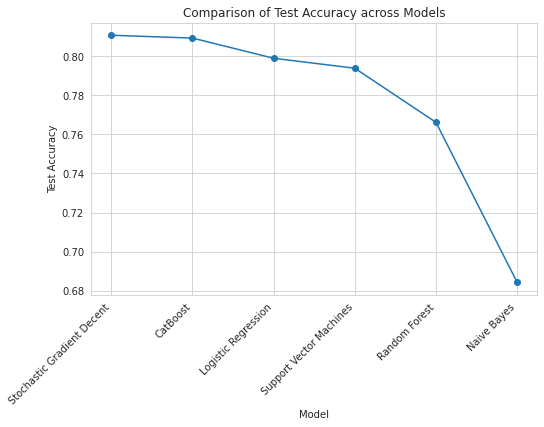

In [133]:
# create a figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(8,5))

# plot the Test accuracy values against the Model names using markers to show the data points
ax.plot(model_test['Model'], model_test['Test accuracy'], marker='o')

# set the x-axis tick labels as the Model names, rotated by 45 degrees and aligned to the right
ax.set_xticklabels(model_test['Model'], rotation=45, ha='right')

# set the x-axis label as 'Model' and the y-axis label as 'Test Accuracy'
ax.set_xlabel('Model')
ax.set_ylabel('Test Accuracy')

# set the plot title
ax.set_title('Comparison of Test Accuracy across Models')

# display the plot
plt.show()

# **Conclusion**

## **EDA**

* The original dataset contains 6 columns and 41157 rows.

* The "Location" column contains around 20.87% of Null values.

* The columns "UserName" and "ScreenName" do not provide any meaningful insights for our analysis.

* For our analysis, we only required the "OriginalTweet" and "Sentiment" columns, and we did not use the "Location" column to avoid NaN values.

* There are five types of sentiments - Extremely Negative, Negative, Neutral, Positive, and Extremely Positive. We merged Extremely Positive with Positive and Extremely Negative with Negative and used encoding with value ‘-1’ for negative, ‘0’ for neutral, and ‘1’ for positive.

* The tweets data were collected between March and April 2020 and for around 30 days.

* Most of the tweets came from London followed by the U.S.

* Among the top 10 mentions in tweets, realDonaldTrump was the top mentioned name, and "#coronavirus" was the most trending hashtag during that period.

## **Overall Model Performance and Ranking**

* The best performing model based on test accuracy is Stochastic Gradient Descent with a score of 0.810739.

* The second best model is CatBoost with a test accuracy score of 0.809281.

* Logistic Regression is the third best model with a score of 0.798955.

* Support Vector Machines has a test accuracy score of 0.793853, making it the fourth best model.

* Random Forest has a test accuracy score of 0.766156, making it the fifth best model.

* Naive Bayes has the lowest test accuracy score of 0.684281.